## 2 . DATOS GENERALES VALENCIA


EL PRECIO DE LA VIVIENDA EN LA COMUNITAT VALENCIANA

El precio de la vivienda en Comunitat Valenciana experimentó en el cuarto trimestre de 2023 un crecimiento interanual del 7,2%, hasta 1380 euros/m². Desde los valores máximos alcanzados en 2008, el valor de los pisos en la región se ha depreciado un 26,5%.

El mercado residencial ha evolucionado en positivo en lo que llevamos de 2023. El precio medio de la vivienda en Comunitat Valenciana en el cuarto trimestre de 2023 es un 7,2%, un dato superior al registrado en el último trimestre del año anterior.

En Comunitat Valenciana el precio de la vivienda alcanzó su máximo en el primer trimestre de 2008 con 1878 €/m² y el mínimo se registró en el primer trimestre de 2001 al alcanzar los 665 €/m².

https://www.tinsa.es/precio-vivienda/comunitat-valenciana/


In [3]:
# 1. Importa pandas, pyplot y seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [8]:
barriosvlc = pd.read_csv("data/barris.csv", sep= ";")
barriosvlc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo distrito-barrio  88 non-null     int64  
 1   Nombre                  88 non-null     object 
 2   Codigo distrito         88 non-null     int64  
 3   Codigo barrio           88 non-null     int64  
 4   Areas de barrios        56 non-null     float64
 5   geo_point_2d            88 non-null     object 
 6   geo_shape               88 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [9]:
barriosvlc

,Codigo distrito-barrio,Nombre,Codigo distrito,Codigo barrio,Areas de barrios,geo_point_2d,geo_shape
0,93,LA CREU COBERTA,9,3,3.748875e+05,"39.45082750748332, -0.3853982961775011","{""coordinates"": [[[-0.3812388903732512, 39.454..."
1,95,CAMI REAL,9,5,1.477502e+06,"39.44492338630296, -0.39555042391499123","{""coordinates"": [[[-0.39830433723075587, 39.45..."
2,106,LA PUNTA,10,6,NaN,"39.4414756787921, -0.3494480667451268","{""coordinates"": [[[-0.3360548430672957, 39.426..."
3,181,BENIMAMET,18,1,NaN,"39.50126515665228, -0.42214469894626794","{""coordinates"": [[[-0.4265075268247919, 39.494..."
4,153,SANT LLORENS,15,3,NaN,"39.49635509681184, -0.36282126402044845","{""coordinates"": [[[-0.3576153239265151, 39.494..."
...,...,...,...,...,...,...,...
83,197,LA TORRE,19,7,NaN,"39.43327922931482, -0.3911988081337183","{""coordinates"": [[[-0.39402607150072677, 39.42..."
84,16,SANT FRANCESC,1,6,4.386583e+05,"39.47010643870186, -0.3760489821791233","{""coordinates"": [[[-0.3756668135307287, 39.473..."
85,151,ELS ORRIOLS,15,1,NaN,"39.494312122911424, -0.3699310988383476","{""coordinates"": [[[-0.367195442699138, 39.5042..."
86,11,LA SEU,1,1,2.210741e+05,"39.47662037964931, -0.3751184490096385","{""coordinates"": [[[-0.3705870978384389, 39.477..."


In [10]:
distritosvlc = pd.read_csv("data/distritos.csv", sep= ";")
distritosvlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                22 non-null     int64  
 1   Nombre                  22 non-null     object 
 2   Código distrito         22 non-null     int64  
 3   gis.gis.DISTRITOS.area  7 non-null      float64
 4   geo_shape               22 non-null     object 
 5   geo_point_2d            22 non-null     object 
 6   latitud                 22 non-null     float64
 7   longitud                22 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.5+ KB


In [11]:
distritosvlc = distritosvlc.sort_values("Código distrito")

In [12]:
distritosvlc

,objectid,Nombre,Código distrito,gis.gis.DISTRITOS.area,geo_shape,geo_point_2d,latitud,longitud
0,9,CIUTAT VELLA,1,1689851.625,"{""coordinates"": [[[-0.3810545927151668, 39.482...","39.474415427888424, -0.37675969658141606",39.474415,-0.376760
8,12,L'EIXAMPLE,2,1733140.500,"{""coordinates"": [[[-0.36453615919605226, 39.47...","39.46411452334249, -0.3704292703233094",39.464115,-0.370429
7,10,EXTRAMURS,3,1971616.250,"{""coordinates"": [[[-0.3833952362210292, 39.481...","39.469024187643456, -0.385780005864596",39.469024,-0.385780
20,103,CAMPANAR,4,NaN,"{""coordinates"": [[[-0.4265075268247919, 39.494...","39.48544365860748, -0.4059322619837058",39.485444,-0.405932
16,6,LA SAIDIA,5,1943931.500,"{""coordinates"": [[[-0.389470864329285, 39.4885...","39.48509467962349, -0.3750723425324177",39.485095,-0.375072
6,8,EL PLA DEL REAL,6,1692712.875,"{""coordinates"": [[[-0.3622859877164847, 39.484...","39.4745936913893, -0.3603780274174357",39.474594,-0.360378
12,151,L'OLIVERETA,7,NaN,"{""coordinates"": [[[-0.41293042982299194, 39.46...","39.468883412030706, -0.4033652971033445",39.468883,-0.403365
4,23,PATRAIX,8,NaN,"{""coordinates"": [[[-0.4143525635090557, 39.459...","39.458397747932665, -0.4004125691493868",39.458398,-0.400413
1,14,JESUS,9,2984760.000,"{""coordinates"": [[[-0.388011313248574, 39.4621...","39.44820147753643, -0.3917921797268368",39.448201,-0.391792
2,1,QUATRE CARRERES,10,NaN,"{""coordinates"": [[[-0.33584292591801684, 39.44...","39.44509289592729, -0.35868167840872534",39.445093,-0.358682


In [ ]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [ ]:
hist_ventavlc["Mes"] = pd.to_datetime(hist_ventavlc["Mes"], format='%B %Y')
hist_ventavlc

,Mes,Precio m2,Variación mensual,Variación trimestral,Variación anual
0,2024-03-01,2.400 €/m2,"+ 1,7 %","+ 5,0 %","+ 13,1 %"
1,2024-02-01,2.359 €/m2,"+ 1,8 %","+ 3,2 %","+ 12,8 %"
2,2024-01-01,2.317 €/m2,"+ 1,3 %","+ 0,7 %","+ 13,5 %"
3,2023-12-01,2.287 €/m2,"0,0 %","- 0,6 %","+ 12,9 %"
4,2023-11-01,2.286 €/m2,"- 0,7 %","+ 0,3 %","+ 12,4 %"
...,...,...,...,...,...
187,2008-08-01,2.245 €/m2,"- 1,5 %","- 3,6 %","- 3,2 %"
188,2008-07-01,2.280 €/m2,"- 1,1 %","- 3,5 %","- 3,4 %"
189,2008-06-01,2.305 €/m2,"- 1,1 %","- 2,3 %","- 2,2 %"
190,2008-05-01,2.330 €/m2,"- 1,4 %","- 2,4 %","- 0,2 %"


In [ ]:
hist_ventavlc.rename(columns={"Mes":"Fecha"}, inplace=True)
hist_ventavlc

,Fecha,Precio m2,Variación mensual,Variación trimestral,Variación anual
0,2024-03-01,2.400 €/m2,"+ 1,7 %","+ 5,0 %","+ 13,1 %"
1,2024-02-01,2.359 €/m2,"+ 1,8 %","+ 3,2 %","+ 12,8 %"
2,2024-01-01,2.317 €/m2,"+ 1,3 %","+ 0,7 %","+ 13,5 %"
3,2023-12-01,2.287 €/m2,"0,0 %","- 0,6 %","+ 12,9 %"
4,2023-11-01,2.286 €/m2,"- 0,7 %","+ 0,3 %","+ 12,4 %"
...,...,...,...,...,...
187,2008-08-01,2.245 €/m2,"- 1,5 %","- 3,6 %","- 3,2 %"
188,2008-07-01,2.280 €/m2,"- 1,1 %","- 3,5 %","- 3,4 %"
189,2008-06-01,2.305 €/m2,"- 1,1 %","- 2,3 %","- 2,2 %"
190,2008-05-01,2.330 €/m2,"- 1,4 %","- 2,4 %","- 0,2 %"


In [ ]:
df = hist_ventavlc

# Convertir la columna 'Precio m2' eliminando el símbolo de euro y convirtiendo a int
df['Precio m2'] = df['Precio m2'].astype(str).str.replace(' €/m2', '').str.replace('.', '').astype(int)

# Convertir las columnas de variación a float, limpiando espacios, signos y porcentajes de forma segura
for column in ['Variación mensual', 'Variación trimestral', 'Variación anual']:
    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace('%', '').str.replace(',', '.').str.strip()  # Elimina porcentajes y espacios
    df[column] = df[column].str.replace(' ', '')  # Elimina espacios adicionales
    df[column] = df[column].str.replace('+', '')  # Elimina el signo más
    df[column] = df[column].str.replace('-', '-').astype(float)  # Asegura que el signo menos se maneje correctamente

# Resultado
hist_ventavlc = df
hist_ventavlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 192 non-null    datetime64[ns]
 1   Precio m2             192 non-null    int64         
 2   Variación mensual     192 non-null    float64       
 3   Variación trimestral  192 non-null    float64       
 4   Variación anual       192 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 7.6 KB


In [ ]:
hist_ventavlc.rename(columns={"Precio m2":"Precio €/m2"}, inplace=True)
hist_ventavlc.rename(columns={"Variación mensual":"Variación mensual (%)"}, inplace=True)
hist_ventavlc.rename(columns={"Variación trimestral":"Variación trimestral (%)"}, inplace=True)
hist_ventavlc.rename(columns={"Variación anual":"Variación anual (%)"}, inplace=True)
hist_ventavlc.to_csv('HistoricoVentasVLC.csv', index=False)

In [ ]:
hist_ventavlc

,Fecha,Precio €/m2,Variación mensual (%),Variación trimestral (%),Variación anual (%)
0,2024-03-01,2400,1.7,5.0,13.1
1,2024-02-01,2359,1.8,3.2,12.8
2,2024-01-01,2317,1.3,0.7,13.5
3,2023-12-01,2287,0.0,-0.6,12.9
4,2023-11-01,2286,-0.7,0.3,12.4
...,...,...,...,...,...
187,2008-08-01,2245,-1.5,-3.6,-3.2
188,2008-07-01,2280,-1.1,-3.5,-3.4
189,2008-06-01,2305,-1.1,-2.3,-2.2
190,2008-05-01,2330,-1.4,-2.4,-0.2


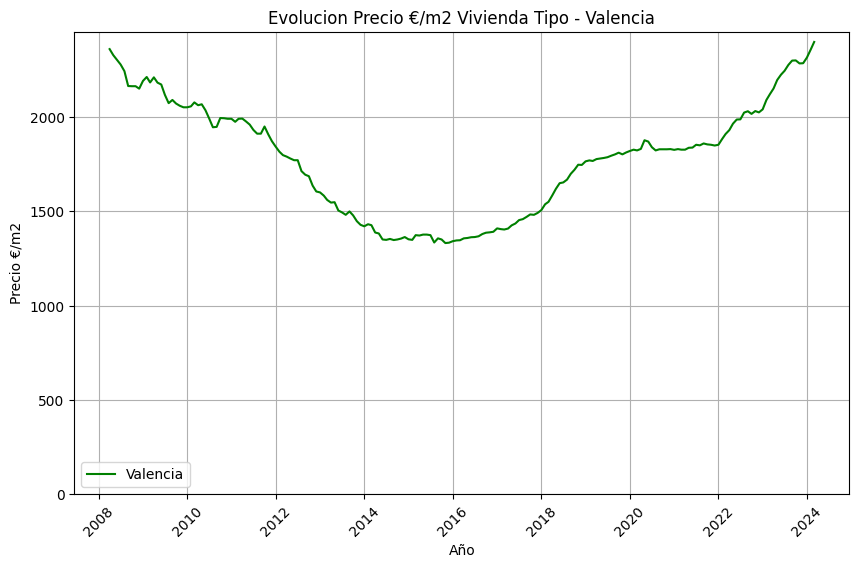

In [ ]:

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(hist_ventavlc['Fecha'], hist_ventavlc['Precio €/m2'], label='Valencia', color = "green")

# Configurar el título y los ejes
plt.title('Evolucion Precio €/m2 Vivienda Tipo - Valencia')
plt.xlabel('Año')
plt.ylabel('Precio €/m2')
plt.grid(True)
plt.ylim(bottom= 0)

# Usar DateFormatter para mostrar solo el año
date_formatter = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

# Agregar leyenda
plt.legend(loc='best')

# Guardar la figura
plt.savefig("5Valencia Evolucion Precio €m2 Vivienda Tipo.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

In [18]:
preciodistval = pd.read_csv("data/precio_distritos_valencia_2024.csv", sep= ",")
preciodistval

,Distrito,Precio m2 mar 2024,Variación mensual,Variación trimestral,Variación anual,Variación máximo,Precio_Historico,Fecha_Historico
0,ALGIROS,2444,2.2,7.6,15.8,0.0,2444,2024-03-01
1,BENICALAP,1960,3.5,8.3,22.8,11.9,2224,2011-04-01
2,BENIMACLET,2362,0.3,4.4,20.2,0.0,2362,2024-03-01
3,CAMINS AL GRAU,2458,0.7,2.9,18.3,0.0,2458,2024-03-01
4,CAMPANAR,3020,2.6,10.4,27.7,0.0,3020,2024-03-01
5,CIUTAT VELLA,3273,1.2,0.5,5.8,0.0,3273,2024-03-01
6,EL PLA DEL REAL,3234,3.7,8.0,16.7,0.0,3234,2024-03-01
7,EXTRAMURS,2783,0.5,4.2,11.2,0.0,2783,2024-03-01
8,JESUS,1821,2.2,2.2,19.4,0.0,1821,2024-03-01
9,L'EIXAMPLE,3615,0.4,2.9,11.6,0.4,3629,2024-02-01


In [19]:
preciodistval.rename(columns={"Precio m2 mar 2024":"Precio €/m2"}, inplace=True)

In [20]:
preciodistval.to_csv('PrecioDistritosValencia2024.csv', index=False)

In [22]:
ibi = pd.read_csv("data/rebuts-ibi-2023.csv", sep= ";")
ibi

,ID,Año,Distrito,Barrio,geo_shape,geo_point_2d,Cod. Barrio,Num. Recibos personalidad F,Num. Recibos personalidad J,Num.Recibos sin personalidad,...,Imp.Recibos Actv.Edificio singular,Imp. Recibos Actv. Espectaculos,Imp. Recibos Actv. Industrial,Imp.Recibos Actv.Obras urbanizacion,Imp.Recibos Actv.Ocio y Hosteleria,Imp. Recibos Actv. Oficinas,Imp. Recibos Actv. Religiosas,Imp. Recibos Actv. Residencial,Imp.Recibos Actv.Sanidad y Beneficiencia,Importe Recibos totales
0,9,2021,BENIMACLET,CAMI DE VERA,"{""coordinates"": [[[-0.35155982565198896, 39.48...","39.48736994071911, -0.3523880755957093",142,4 326,253,7,...,"0,00","0,00","25 996,05","40 631,41","0,00","4 154,97","0,00","920 696,05","725,98","1 199 274,25"
1,10,2021,CAMINS AL GRAU,AIORA,"{""coordinates"": [[[-0.3483563963597515, 39.469...","39.46573283778115, -0.34335984023183136",121,18 574,1 125,30,...,"0,00","2 242,08","98 204,22","30 600,36","66 060,40","72 017,31","687,38","3 112 114,34","37 597,18","4 303 271,37"
2,15,2021,CAMPANAR,CAMPANAR,"{""coordinates"": [[[-0.3901156730699699, 39.485...","39.4810529498831, -0.3942219586128438",41,9 183,1 200,38,...,"101 928,20","0,00","97 210,06","16 337,54","312 946,37","554 392,60","2 647,91","2 301 980,03","741 313,28","6 944 397,12"
3,18,2021,CAMPANAR,SANT PAU,"{""coordinates"": [[[-0.4265075268247919, 39.494...","39.48666890167039, -0.41060784620169233",44,15 747,2 073,85,...,"29 265,31","0,00","212 010,96","67 826,10","6 298,16","134 393,74","0,00","3 758 640,24","548 738,10","6 429 800,01"
4,26,2021,EL PLA DEL REAL,EXPOSICIO,"{""coordinates"": [[[-0.3651338930976791, 39.479...","39.47613782154427, -0.3636903649528479",61,5 545,1 520,25,...,"0,00","0,00","86 911,51","4 754,04","18 534,20","540 992,95","0,00","2 537 777,17","72 398,24","3 889 495,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,251,2023,POBLES DEL SUD,PINEDO,"{""coordinates"": [[[-0.3501774078804209, 39.422...","39.406290326215334, -0.33967854582733203",193,1699,147,2,...,"279,01","18053,63","42008,6","7253,69","38957,92","7556,72",0,"384776,91","651,38","577187,41"
257,257,2023,QUATRE CARRERES,MONTOLIVET,"{""coordinates"": [[[-0.36224094279847086, 39.46...","39.45938040111877, -0.3634937426230126",101,13442,816,342,...,"307,02",0,"32847,4","2824,33","11252,52","40880,28","185,97","2674668,42","32613,19","3363372,47"
258,86,2021,RASCANYA,SANT LLORENS,"{""coordinates"": [[[-0.3576153239265151, 39.494...","39.49635509681184, -0.36282126402044845",153,10 100,560,15,...,"23 520,53","13 668,59","21 881,30","55 373,77","533,32","109 109,05","0,00","2 236 590,11","735,91","3 798 292,43"
259,256,2023,QUATRE CARRERES,MALILLA,"{""coordinates"": [[[-0.3757687235613473, 39.456...","39.44475178989505, -0.37718459638761753",103,16352,1326,44,...,"11445,74","1856,44","150007,67","238560,7","1959,11","36038,08",0,"3288256,17","1621879,56","6354275,84"


In [27]:
ibi = ibi.drop(["Barrio", "geo_shape", "geo_point_2d", "Cod. Barrio"], axis= 1)
ibi

,ID,Año,Distrito,Num. Recibos personalidad F,Num. Recibos personalidad J,Num.Recibos sin personalidad,Num.Recibos Almacen-Estacionamiento,Num. Recibos Actv. Comercial,Num. Recibos Actv. Cultural,Num. Recibos Actv. Deportiva,...,Imp.Recibos Actv.Edificio singular,Imp. Recibos Actv. Espectaculos,Imp. Recibos Actv. Industrial,Imp.Recibos Actv.Obras urbanizacion,Imp.Recibos Actv.Ocio y Hosteleria,Imp. Recibos Actv. Oficinas,Imp. Recibos Actv. Religiosas,Imp. Recibos Actv. Residencial,Imp.Recibos Actv.Sanidad y Beneficiencia,Importe Recibos totales
0,9,2021,BENIMACLET,4 326,253,7,1 747,210,4,2,...,"0,00","0,00","25 996,05","40 631,41","0,00","4 154,97","0,00","920 696,05","725,98","1 199 274,25"
1,10,2021,CAMINS AL GRAU,18 574,1 125,30,6 469,1 121,24,5,...,"0,00","2 242,08","98 204,22","30 600,36","66 060,40","72 017,31","687,38","3 112 114,34","37 597,18","4 303 271,37"
2,15,2021,CAMPANAR,9 183,1 200,38,3 660,778,10,2,...,"101 928,20","0,00","97 210,06","16 337,54","312 946,37","554 392,60","2 647,91","2 301 980,03","741 313,28","6 944 397,12"
3,18,2021,CAMPANAR,15 747,2 073,85,10 044,397,7,1,...,"29 265,31","0,00","212 010,96","67 826,10","6 298,16","134 393,74","0,00","3 758 640,24","548 738,10","6 429 800,01"
4,26,2021,EL PLA DEL REAL,5 545,1 520,25,3 290,245,11,3,...,"0,00","0,00","86 911,51","4 754,04","18 534,20","540 992,95","0,00","2 537 777,17","72 398,24","3 889 495,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,251,2023,POBLES DEL SUD,1699,147,2,311,86,4,5,...,"279,01","18053,63","42008,6","7253,69","38957,92","7556,72",0,"384776,91","651,38","577187,41"
257,257,2023,QUATRE CARRERES,13442,816,342,3918,671,8,7,...,"307,02",0,"32847,4","2824,33","11252,52","40880,28","185,97","2674668,42","32613,19","3363372,47"
258,86,2021,RASCANYA,10 100,560,15,5 489,250,4,7,...,"23 520,53","13 668,59","21 881,30","55 373,77","533,32","109 109,05","0,00","2 236 590,11","735,91","3 798 292,43"
259,256,2023,QUATRE CARRERES,16352,1326,44,5984,542,24,6,...,"11445,74","1856,44","150007,67","238560,7","1959,11","36038,08",0,"3288256,17","1621879,56","6354275,84"


In [28]:
ibi2023 = ibi[ibi["Año"] == 2023]

In [29]:
ibi2023

,ID,Año,Distrito,Num. Recibos personalidad F,Num. Recibos personalidad J,Num.Recibos sin personalidad,Num.Recibos Almacen-Estacionamiento,Num. Recibos Actv. Comercial,Num. Recibos Actv. Cultural,Num. Recibos Actv. Deportiva,...,Imp.Recibos Actv.Edificio singular,Imp. Recibos Actv. Espectaculos,Imp. Recibos Actv. Industrial,Imp.Recibos Actv.Obras urbanizacion,Imp.Recibos Actv.Ocio y Hosteleria,Imp. Recibos Actv. Oficinas,Imp. Recibos Actv. Religiosas,Imp. Recibos Actv. Residencial,Imp.Recibos Actv.Sanidad y Beneficiencia,Importe Recibos totales
21,231,2023,POBLATS MARITIMS,13414,2679,27,2635,779,45,5,...,"31181,43","27969,64","104680,65","52038,31","370977,45","76861,97","817,71","2304805,64","21801,25","3465783,67"
48,177,2023,ALGIROS,5371,501,35,2276,303,5,8,...,0,"1114,08","21170,57",575,"6090,1","24897,71",0,"1387328,77","4916,83","1841101,68"
49,180,2023,BENICALAP,30077,3916,84,12950,1258,43,17,...,"10984,54","1035,42","162389,08","122003,37","733040,55","127116,87","10946,5","5857108,7","35779,43","8653676,08"
50,182,2023,BENIMACLET,18934,1688,63,6050,1478,16,4,...,"15297,86","890,03","27056,34","6623,26","17333,01","223722,09",0,"4054903,83","14720,41","5436457,74"
51,184,2023,CAMINS AL GRAU,18631,1155,34,6521,1122,26,5,...,0,"2242,08","92125,87","23968,32","80120,6","72017,31","687,38","3113701,73","37597,18","4322408,95"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,246,2023,POBLES DEL SUD,520,53,0,39,13,2,2,...,"1040,44",0,"16233,46","6037,89","37613,11","798,58",0,"134605,72",0,"218587,6"
255,248,2023,POBLES DEL SUD,2594,181,18,643,39,2,1,...,"4936,8","2548,25","4675,33","3846,45","12339,27","373,66",0,"759167,65","710,77","1029785,64"
256,251,2023,POBLES DEL SUD,1699,147,2,311,86,4,5,...,"279,01","18053,63","42008,6","7253,69","38957,92","7556,72",0,"384776,91","651,38","577187,41"
257,257,2023,QUATRE CARRERES,13442,816,342,3918,671,8,7,...,"307,02",0,"32847,4","2824,33","11252,52","40880,28","185,97","2674668,42","32613,19","3363372,47"


In [31]:
ibi2023 = ibi2023.drop(["ID", "Año"], axis= 1)
ibi2023.info()

KeyError: "['ID', 'Año'] not found in axis"

In [32]:
ibi2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 21 to 259
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Distrito                                  87 non-null     object
 1   Num. Recibos personalidad F               87 non-null     object
 2   Num. Recibos personalidad J               87 non-null     object
 3   Num.Recibos sin personalidad              87 non-null     int64 
 4   Num.Recibos Almacen-Estacionamiento       87 non-null     object
 5   Num. Recibos Actv. Comercial              87 non-null     object
 6   Num. Recibos Actv. Cultural               87 non-null     int64 
 7   Num. Recibos Actv. Deportiva              87 non-null     int64 
 8   Num.Recibos Actv.Edificio singular        87 non-null     int64 
 9   Num. Recibos Actv. Espectaculos           87 non-null     int64 
 10  Num. Recibos Actv. Industrial             87 non-null  

In [36]:
for column in ibi2023.columns:
    if ibi2023[column].dtype == 'object' and "," in  ibi2023[column]  :
        ibi2023[column] = ibi2023[column].str.replace(',', '').astype(float)
        

In [1]:
ibi2023

NameError: name 'ibi2023' is not defined

In [50]:
ibi2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 21 to 259
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Distrito                                  87 non-null     object 
 1   Num. Recibos personalidad F               87 non-null     object 
 2   Num. Recibos personalidad J               87 non-null     object 
 3   Num.Recibos sin personalidad              87 non-null     int64  
 4   Num.Recibos Almacen-Estacionamiento       87 non-null     object 
 5   Num. Recibos Actv. Comercial              87 non-null     object 
 6   Num. Recibos Actv. Cultural               87 non-null     int64  
 7   Num. Recibos Actv. Deportiva              87 non-null     int64  
 8   Num.Recibos Actv.Edificio singular        87 non-null     int64  
 9   Num. Recibos Actv. Espectaculos           87 non-null     int64  
 10  Num. Recibos Actv. Industrial             8

In [4]:
ibis2023 = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/Ibis_agrupados_2023.csv", sep=(","))
ibis2023

,nombre,Num. Recibos personalidad F,Num. Recibos personalidad J,Num.Recibos sin personalidad,Num.Recibos Almacen-Estacionamiento,Num. Recibos Actv. Comercial,Num. Recibos Actv. Cultural,Num. Recibos Actv. Deportiva,Num.Recibos Actv.Edificio singular,Num. Recibos Actv. Espectaculos,...,Imp.Recibos Actv.Edificio singular,Imp. Recibos Actv. Espectaculos,Imp. Recibos Actv. Industrial,Imp.Recibos Actv.Obras urbanizacion,Imp.Recibos Actv.Ocio y Hosteleria,Imp. Recibos Actv. Oficinas,Imp. Recibos Actv. Religiosas,Imp. Recibos Actv. Residencial,Imp.Recibos Actv.Sanidad y Beneficiencia,Importe Recibos totales
0,ALGIROS,29925.0,3073.0,108.0,10423.0,1847.0,64.0,18.0,3.0,2.0,...,18763.97,5261.78,53149.46,15885.46,9704.62,123607.54,405.72,6970599.16,48280.97,8936335.66
1,BENICALAP,33307.0,4134.0,87.0,13417.0,1403.0,131.0,23.0,8.0,2.0,...,10984.54,1035.42,206108.88,129287.42,734785.36,152597.47,11459.32,6396145.40,38007.93,9358981.59
2,BENIMACLET,23258.0,1941.0,70.0,7797.0,1688.0,20.0,6.0,4.0,4.0,...,15297.86,890.03,55833.43,46524.38,17333.01,227877.06,0.00,4974183.81,15446.39,6636366.67
3,CAMINS AL GRAU,50458.0,5734.0,112.0,21142.0,2452.0,41.0,16.0,0.0,13.0,...,0.00,8220.32,229969.16,166576.34,1220186.23,283965.50,1478.64,11210004.97,124012.37,18337032.39
4,CAMPANAR,32851.0,3958.0,150.0,16054.0,1601.0,25.0,10.0,9.0,1.0,...,376296.02,0.00,315235.65,86965.02,327528.74,719864.52,2647.91,7555779.17,1293273.04,15581078.38
5,CIUTAT VELLA,25915.0,10243.0,309.0,10508.0,3468.0,91.0,4.0,92.0,15.0,...,545316.13,172597.73,98032.18,83821.05,979856.49,3955671.97,9787.42,9274683.59,141063.56,22148606.44
6,EL PLA DEL REAL,25288.0,4148.0,1009.0,12553.0,1175.0,45.0,12.0,6.0,1.0,...,205502.00,0.00,97781.07,57038.33,570823.65,1983989.30,8565.57,9584081.44,198459.04,15519841.66
7,EXTRAMURS,40837.0,5498.0,161.0,14936.0,2913.0,63.0,8.0,5.0,1.0,...,326220.54,1643.01,116489.98,72877.20,139809.85,1267741.67,1517.77,11612430.68,75600.58,17385168.15
8,JESUS,37127.0,2470.0,131.0,11846.0,2224.0,80.0,20.0,35.0,3.0,...,70025.87,4752.49,169579.82,157715.55,10107.89,183867.66,6460.72,6780465.77,110486.78,9248109.60
9,L'EIXAMPLE,36972.0,6768.0,337.0,14221.0,3314.0,96.0,17.0,5.0,7.0,...,107748.78,59115.91,112985.68,34968.00,224275.47,2284825.71,6134.09,13222830.59,91703.00,22558451.38


In [6]:
preciosdistrito = pd.read_csv(r"/Users/cescrosello/Desktop/Bootcamp - WIP/DataScience-Mar2024/EDA_RealEstateValencia2024/BI_Distritosvalencia2024.csv", sep=(","))
preciosdistrito

,objectid,Distrito,Código distrito,gis.gis.DISTRITOS.area,geo_shape,geo_point_2d,latitud,longitud,Precio €/m2,Variación mensual,Variación trimestral,Variación anual,Variación máximo,Precio_Historico,Fecha_Historico
0,9,CIUTAT VELLA,1,1689851.625,"{""coordinates"": [[[-0.3810545927151668, 39.482...","39.474415427888424, -0.37675969658141606",39.474415,-0.376760,3273,1.2,0.5,5.8,0.0,3273,2024-03-01
1,14,JESUS,9,2984760.000,"{""coordinates"": [[[-0.388011313248574, 39.4621...","39.44820147753643, -0.3917921797268368",39.448201,-0.391792,1821,2.2,2.2,19.4,0.0,1821,2024-03-01
2,1,QUATRE CARRERES,10,NaN,"{""coordinates"": [[[-0.33584292591801684, 39.44...","39.44509289592729, -0.35868167840872534",39.445093,-0.358682,2231,0.7,7.4,10.9,0.1,2233,2023-10-01
3,23,PATRAIX,8,NaN,"{""coordinates"": [[[-0.4143525635090557, 39.459...","39.458397747932665, -0.4004125691493868",39.458398,-0.400413,2001,4.3,8.0,20.1,0.0,2001,2024-03-01
4,8,EL PLA DEL REAL,6,1692712.875,"{""coordinates"": [[[-0.3622859877164847, 39.484...","39.4745936913893, -0.3603780274174357",39.474594,-0.360378,3234,3.7,8.0,16.7,0.0,3234,2024-03-01
5,10,EXTRAMURS,3,1971616.250,"{""coordinates"": [[[-0.3833952362210292, 39.481...","39.469024187643456, -0.385780005864596",39.469024,-0.385780,2783,0.5,4.2,11.2,0.0,2783,2024-03-01
6,12,L'EIXAMPLE,2,1733140.500,"{""coordinates"": [[[-0.36453615919605226, 39.47...","39.46411452334249, -0.3704292703233094",39.464115,-0.370429,3615,0.4,2.9,11.6,0.4,3629,2024-02-01
7,71,ALGIROS,13,NaN,"{""coordinates"": [[[-0.342757228635524, 39.4870...","39.47762702932769, -0.3427393297488325",39.477627,-0.342739,2444,2.2,7.6,15.8,0.0,2444,2024-03-01
8,135,RASCANYA,15,NaN,"{""coordinates"": [[[-0.36769572194284833, 39.50...","39.495738628061105, -0.3676525156959352",39.495739,-0.367653,1678,0.3,8.2,18.3,0.4,1684,2009-12-01
9,151,L'OLIVERETA,7,NaN,"{""coordinates"": [[[-0.41293042982299194, 39.46...","39.468883412030706, -0.4033652971033445",39.468883,-0.403365,1726,2.6,4.6,12.7,12.0,1961,2010-02-01
